In [228]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
%matplotlib inline
import seaborn as sns
import matplotlib.lines as mlines
#from matplotlib import set_cmap

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [9]:
def getCleanData(fileName):
    soup = BeautifulSoup(open(fileName))
    links  = soup.find_all("a")
    g_data = soup.find_all("div",{"class":"atcui-section atcui-clearfix   listing-content "})

    price = []
    mileage = []
    distance = []   
    
    for item in g_data:
        temp1 = item.find_all("div",{"class":"atcui-column  listingColumn1"})
        #print the price
        #print(temp1[0].find_all("h4",{"class":"primary-price"})[0].text)
        price.append(temp1[0].find_all("h4",{"class":"primary-price"})[0].text)  
        temp2 = item.find_all("div",{"class":"atcui-column  listingColumn2"})
        temp3 = temp2[0].find_all("span",{"class":"mileage"})
        if len(temp3)>0:
            #print the mileage
            #print(temp2[0].find_all("span",{"class":"mileage"})[0].text)
            mileage.append(temp2[0].find_all("span",{"class":"mileage"})[0].text)
        else:
            mileage.append('0')
 
        
        temp4 = item.find_all("div",{"class":"owner-details"})
        
        if temp4:
            temp5 = temp4[0].find_all("span",{"class":"distance-cont"})
       
            #price.append(temp1[0].find_all("h4",{"class":"primary-price"})[0].text)
            distance.append(temp5[0].text.split(' ')[0])           
        else:
            distance.append(0)
                
    priceKeep = []
    mileageKeep = []
    distanceKeep = []
    for i in range(0,len(price)):
        lenTemp = len(price[i].split())
        if (lenTemp!=0):
            priceKeep.append(int(price[i].split()[0].replace(',','').replace('$','')))
            mileageKeep.append(int(mileage[i].split()[0].replace(',','')))
            distanceKeep.append(distance[i])
    return (priceKeep,mileageKeep,distanceKeep)

In [10]:
priceMiles = {}
year  = [2012,2013,2014]
pages = [[1,2,3,4,5,6,7],[1,2,3,4],[1,2,3]]

for i in range(len(year)):
    print(i)
    price = []
    miles = []
    distance = []
    for j in pages[i]:
        fileName = "./exampleAutodata/accord" + str(year[i]) + "p00" + str(j) + ".htm"

        priceTemp,milesTemp,distanceTemp = getCleanData(fileName)
        price += priceTemp
        miles += milesTemp
        distance += distanceTemp
    priceMiles.update({str(year[i]): [price,miles,distance]})
    
    

0
1
2


In [11]:
def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x,y,width,height],axisbg=axisbg)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

2012
(0.8941176533699036, 0.10196078568696976, 0.1098039224743836)
2013
(0.21602460800432688, 0.4948712038058858, 0.7198769869757634)
2014
(0.30426760128900115, 0.6832910605505401, 0.29293349969620797)


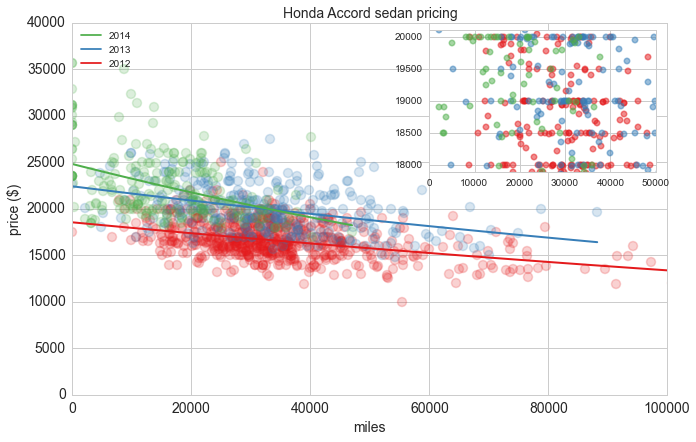

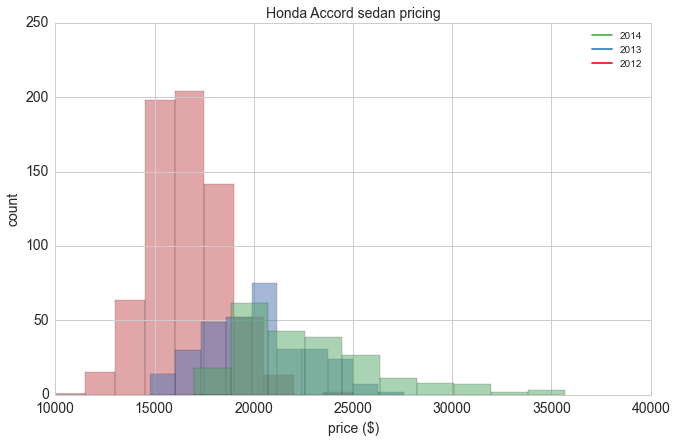

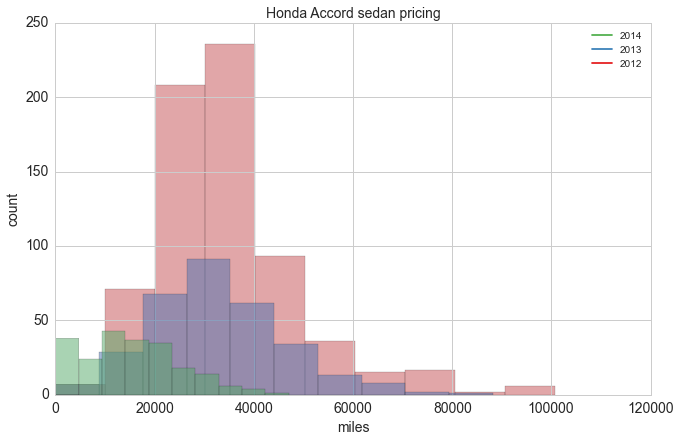

In [327]:
plt.get_cmap('copper')
#color = [cmx.rainbow(0),cmx.rainbow(128),cmx.rainbow(240)]
#color = sns.color_palette("Set2", 10)
color=[(0.89411765336990356, 0.10196078568696976, 0.1098039224743836),
 (0.21602460800432688, 0.49487120380588578, 0.71987698697576341),
 (0.30426760128900115, 0.68329106055054012, 0.29293349969620797)]

#color = [[0,102/255,255/255],[51/255,204/255,11/255],[200/255,20/255,20/255]]

k = 0
fig,ax = plt.subplots()
plotHandel = [0,0,0]
for i in year:
    print(i)
    x = priceMiles[str(i)][1]
    y = priceMiles[str(i)][0]
    ax.scatter(x,y,\
                               color=color[k],s=80,linewidth=1.5,edgecolor=[0, 0, 0],\
                               alpha=0.2);plt.hold
    xFit,yFit = decayFit(x,y)
    ax.plot(xFit,yFit,color=color[k],linewidth=2,)
    print(color[k])
    k = k+1;

line = [0,0,0]
line[2] = (mlines.Line2D([], [], color=color[0], label='2012'))
line[1] = (mlines.Line2D([], [], color=color[1], label='2013'))
line[0] = (mlines.Line2D([], [], color=color[2], label='2014'))

ax.set_xlim([0,100000])
ax.set_ylim([0, 40000])  

plt.xlabel('miles',fontsize=14)
plt.ylabel('price ($)',fontsize=14)

ax1 = add_subplot_axes(ax,[0.6,0.6,0.38,0.38],axisbg='w')
k = 0
for i in year:
    ax1.scatter(priceMiles[str(i)][1],priceMiles[str(i)][0],\
                               color=color[k],s=30,linewidth=1.5,edgecolor="black",\
                               alpha=0.5);plt.hold
    k = k+1;

fig = plt.gcf()
fig.set_size_inches(16/1.5,10/1.5)


ax1.set_xlim([0,50000])
ax1.set_ylim([17900,20100])
#ax.legend(reversed(plotHandel),reversed(year),loc=2)
#ax.legend(plotHandel,reversed(year),loc=2)
ax.legend(handles = line,loc=2)
ax.set_title('Honda Accord sedan pricing',fontsize=14)
kk = ax.get_xticklabels()
for item in (ax.get_xticklabels() +ax.get_yticklabels()):
    item.set_fontsize(14)
for item in (ax1.get_xticklabels() +ax1.get_yticklabels()):
    item.set_fontsize(10)


#fig.savefig('carPriceVsMiles.png', dpi=100
x0 = priceMiles['2014'][0]
x1 = priceMiles['2013'][0]
x2 = priceMiles['2012'][0]
color=[(0, 0, 0),
       (0, 0,0),
       (0, 0, 0),
 ]
fig2,ax2 = plt.subplots()
#n, bins, patches = ax2.hist([x0,x1,x2], 10, histtype='step', stacked=True, fill=True,alpha=0.6,\
#                      label=['2012', '2013', '2014'],\
#                            color=color)

ax2.hist(x1, alpha=0.5, label='2014',zorder = 1)
ax2.hist(x0,alpha=0.5, label='2013',zorder = 2)
ax2.hist(x2, alpha=0.5, label='2012',zorder = 0)

ax2.set_title('Honda Accord sedan pricing',fontsize=14)
kk = ax2.get_xticklabels()
for item in (ax2.get_xticklabels() +ax2.get_yticklabels()):
    item.set_fontsize(14)

ax2.legend(handles = line,loc=1)
#fig2.show()
ax2.set_xlabel('price ($)',fontsize=14)
ax2.set_ylabel('count',fontsize=14)

fig = plt.gcf()
fig.set_size_inches(16/1.5,10/1.5)


#check based on miles
#fig.savefig('carPriceVsMiles.png', dpi=100
x0 = priceMiles['2014'][1]
x1 = priceMiles['2013'][1]
x2 = priceMiles['2012'][1]
color=[(0, 0, 0),
       (0, 0,0),
       (0, 0, 0),
 ]
fig3,ax3 = plt.subplots()
#n, bins, patches = ax2.hist([x0,x1,x2], 10, histtype='step', stacked=True, fill=True,alpha=0.6,\
#                      label=['2012', '2013', '2014'],\
#                            color=color)

ax3.hist(x1, alpha=0.5, zorder = 1)
ax3.hist(x0, alpha=0.5,zorder = 2)
ax3.hist(x2, alpha=0.5,zorder = 0)

ax3.set_title('Honda Accord sedan pricing',fontsize=14)
kk = ax3.get_xticklabels()
for item in (ax3.get_xticklabels() +ax3.get_yticklabels()):
    item.set_fontsize(14)

ax3.legend(handles = line,loc=1)
#fig3.show()
ax3.set_xlabel('miles',fontsize=14)
ax3.set_ylabel('count',fontsize=14)

fig = plt.gcf()
fig.set_size_inches(16/1.5,10/1.5)


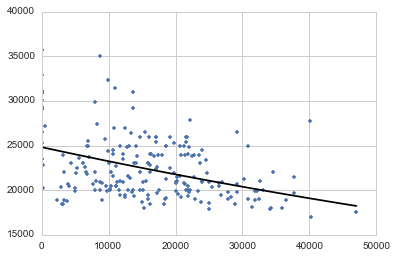

In [146]:
x = priceMiles[str(i)][1]
y = priceMiles[str(i)][0]
xFit,yFit = decayFit(x,y)
plt.plot(x,y,'.')
plt.hold
plt.plot(xFit,yFit,'k')

24819.0106222
(100,)
(100,)


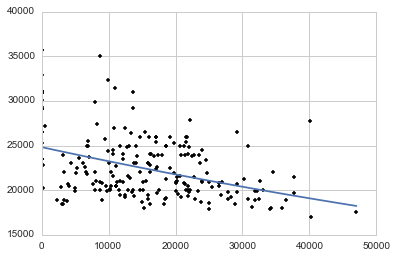

In [140]:
#test code for fitting

x = priceMiles[str(i)][1]
y = priceMiles[str(i)][0]
import sklearn as sk
from sklearn.linear_model import LinearRegression

plt.plot(x,y,'k.')
plt.hold
xTrans = np.asarray(x)
yTrans = np.asarray(y)

#xTrans = np.log(x)
yTrans = np.log(y)

#filter
idx = xTrans>-np.inf
xTrans = xTrans[idx]
yTrans = yTrans[idx]
idx2 = yTrans>-np.inf

#filter
xTrans = xTrans[idx2]
yTrans = yTrans[idx2]
xTrans = xTrans.reshape((-1,1))
yTrans = yTrans.reshape((-1,1))

clf = LinearRegression(fit_intercept=True)

#print(len(yTrans))
linearFit = clf.fit(xTrans,yTrans)

B = np.exp(linearFit.intercept_[0])
M = linearFit.coef_[0]

print(B)
xFit = np.linspace(np.min(xTrans),np.max(xTrans),100)
yFit = B*np.exp(M*xFit)

print(np.shape(xFit))
print(np.shape(xFit))
plt.plot(xFit,yFit)

In [142]:
#test code for fitting
def decayFit(x,y):

    import sklearn as sk
    from sklearn.linear_model import LinearRegression

    xTrans = np.asarray(x)
    yTrans = np.asarray(y)

    yTrans = np.log(y)

    #filter
    idx = xTrans>-np.inf
    xTrans = xTrans[idx]
    yTrans = yTrans[idx]
    idx2 = yTrans>-np.inf

    #filter
    xTrans = xTrans[idx2]
    yTrans = yTrans[idx2]
    xTrans = xTrans.reshape((-1,1))
    yTrans = yTrans.reshape((-1,1))

    clf = LinearRegression(fit_intercept=True)
    linearFit = clf.fit(xTrans,yTrans)
    B = np.exp(linearFit.intercept_[0])
    M = linearFit.coef_[0]

    xFit = np.linspace(np.min(xTrans),np.max(xTrans),100)
    yFit = B*np.exp(M*xFit)
    return xFit, yFit


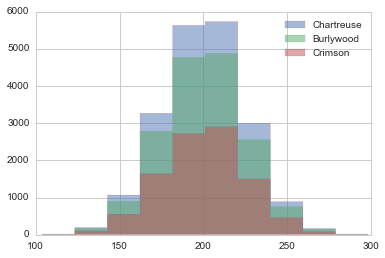

In [163]:
#!/usr/bin/env python
import numpy as np
import pylab as P

#
# histogram has the ability to plot multiple data in parallel ...
# Note the new color kwarg, used to override the default, which
# uses the line color cycle.
#

#
# ... or we can stack the data
#

# we can also stack using the step histtype
#

P.figure()
n, bins, patches = P.hist([x0,x1,x2], 10, histtype='step', stacked=True, fill=True,alpha=0.5,\
                      label=['Crimson', 'Burlywood', 'Chartreuse'])
P.legend()
P.show()



[(0.89411765336990356, 0.10196078568696976, 0.1098039224743836),
 (0.21602460800432688, 0.49487120380588578, 0.71987698697576341),
 (0.30426760128900115, 0.68329106055054012, 0.29293349969620797),
 (0.60083047361934894, 0.30814303335021531, 0.63169552298153153),
 (1.0, 0.50591311045721454, 0.0031372549487094226),
 (0.99315647868549106, 0.98700499826786559, 0.19915417450315831),
 (0.65845446095747096, 0.34122261685483596, 0.17079585352364723),
 (0.95850826852461857, 0.50846600392285535, 0.7449288887136124),
 (0.60000002384185791, 0.60000002384185791, 0.60000002384185791)]

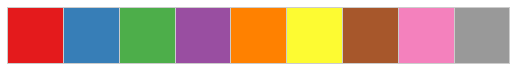

In [198]:
sns.choose_colorbrewer_palette('qualitative')

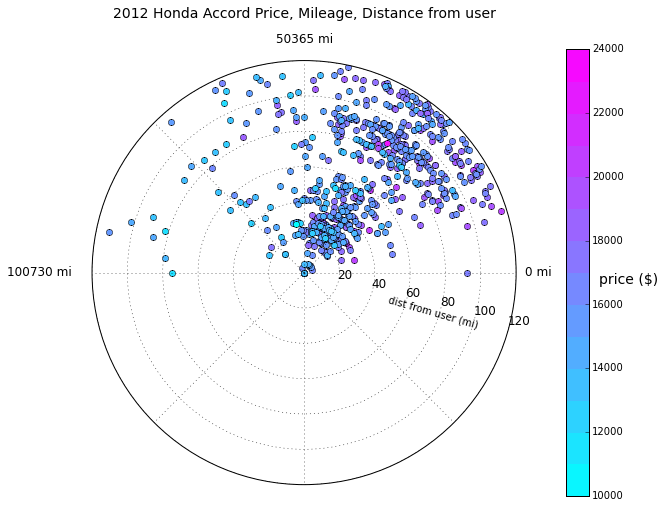

In [83]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

priceKeep = priceMiles['2012'][0]
mileageKeep = priceMiles['2012'][1]
distanceKeep = priceMiles['2012'][2]

variableScaled = [x - min(mileageKeep) for x in mileageKeep]
variableScaled = [x*3.14159/max(variableScaled) for x in variableScaled]
jet = cm = plt.get_cmap('cool') 

Z = [[0,0],[0,0]]
levels = range(min(priceKeep),max(priceKeep),1000)
CS3 = plt.contourf(Z, levels, cmap=jet)
plt.clf()


ax = plt.subplot(111, polar=True)


cNorm  = colors.Normalize(vmin=min(priceKeep), vmax=max(priceKeep))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)


for i in range(len(distanceKeep)):
    colorVal = scalarMap.to_rgba(priceKeep[i])
    colorText = (
        'color: (%4.2f,%4.2f,%4.2f)'%(colorVal[0],colorVal[1],colorVal[2])
        )
    ax.plot(variableScaled[i], distanceKeep[i], 'ko' ,color=colorVal, linewidth=3)

#ax.set_rmax(2.0)
delta = max(mileageKeep)-min(mileageKeep)
base = min(mileageKeep)
ax.set_xticklabels([""+str(base)+" mi", '', str(round(base+1/2*delta))+" mi", '', str(round(base+delta))+" mi", '', '', ''],fontsize=12)
ax.get_xaxis().majorTicks[0].label1.set_horizontalalignment('center')
ax.get_xaxis().majorTicks[4].label1.set_horizontalalignment('right')
ax.grid(True)



#cax = ax.imshow(priceKeep, interpolation='nearest', cmap=jet)
ax.set_title('2012 Honda Accord Price, Mileage, Distance from user\n',fontsize=14)
ax.set_rgrids([20,40,60,80,100,120], angle=345,fontsize=12)


cbar = plt.colorbar(CS3,pad=0.09) # using the colorbar info I got from contourf
cbar.set_label("price ($)",rotation=0,fontsize=14)


fig = plt.gcf()
fig.set_size_inches(10,8)
ax.text(2*3.141-.35, 50, "dist from user (mi)", fontdict=None, withdash=False,rotation=-.28*180/3.14159)

plt.show()

fig.savefig('carPricePolar.png', dpi=100)

# Add colorbar, make sure to specify tick locations to match desired ticklabels
#cax = ax.contourf(variableScaled, int(distance), priceKeep)
#cb1 = fig.colorbar(cax)